کد پایین برای دانلود دیتاست

In [ ]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2025-10-07 07:09:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K   190KB/s    in 0.2s    

2025-10-07 07:09:47 (190 KB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



Train set: (800, 11) (800,)
Test set: (200, 11) (200,)

=== KNN Results ===
Train set Accuracy:  0.5475
Test set Accuracy:  0.32
Test set F1-score:  0.31162023427606583

=== SVM Results ===
Linear SVM - Train Accuracy:  0.43375
Linear SVM - Test Accuracy:  0.39
Linear SVM - Test F1-score:  0.38004864080335776
RBF SVM - Train Accuracy:  0.52375
RBF SVM - Test Accuracy:  0.39
RBF SVM - Test F1-score:  0.3815642704071693

=== Logistic Regression Results ===
Logistic Regression - Train Accuracy:  0.42625
Logistic Regression - Test Accuracy:  0.415
Logistic Regression - Test F1-score:  0.40791772522705955

=== Detailed Classification Reports ===

KNN Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.45      0.37        51
           2       0.33      0.36      0.35        44
           3       0.33      0.30      0.31        54
           4       0.31      0.18      0.23        51

    accuracy                           0.32       2

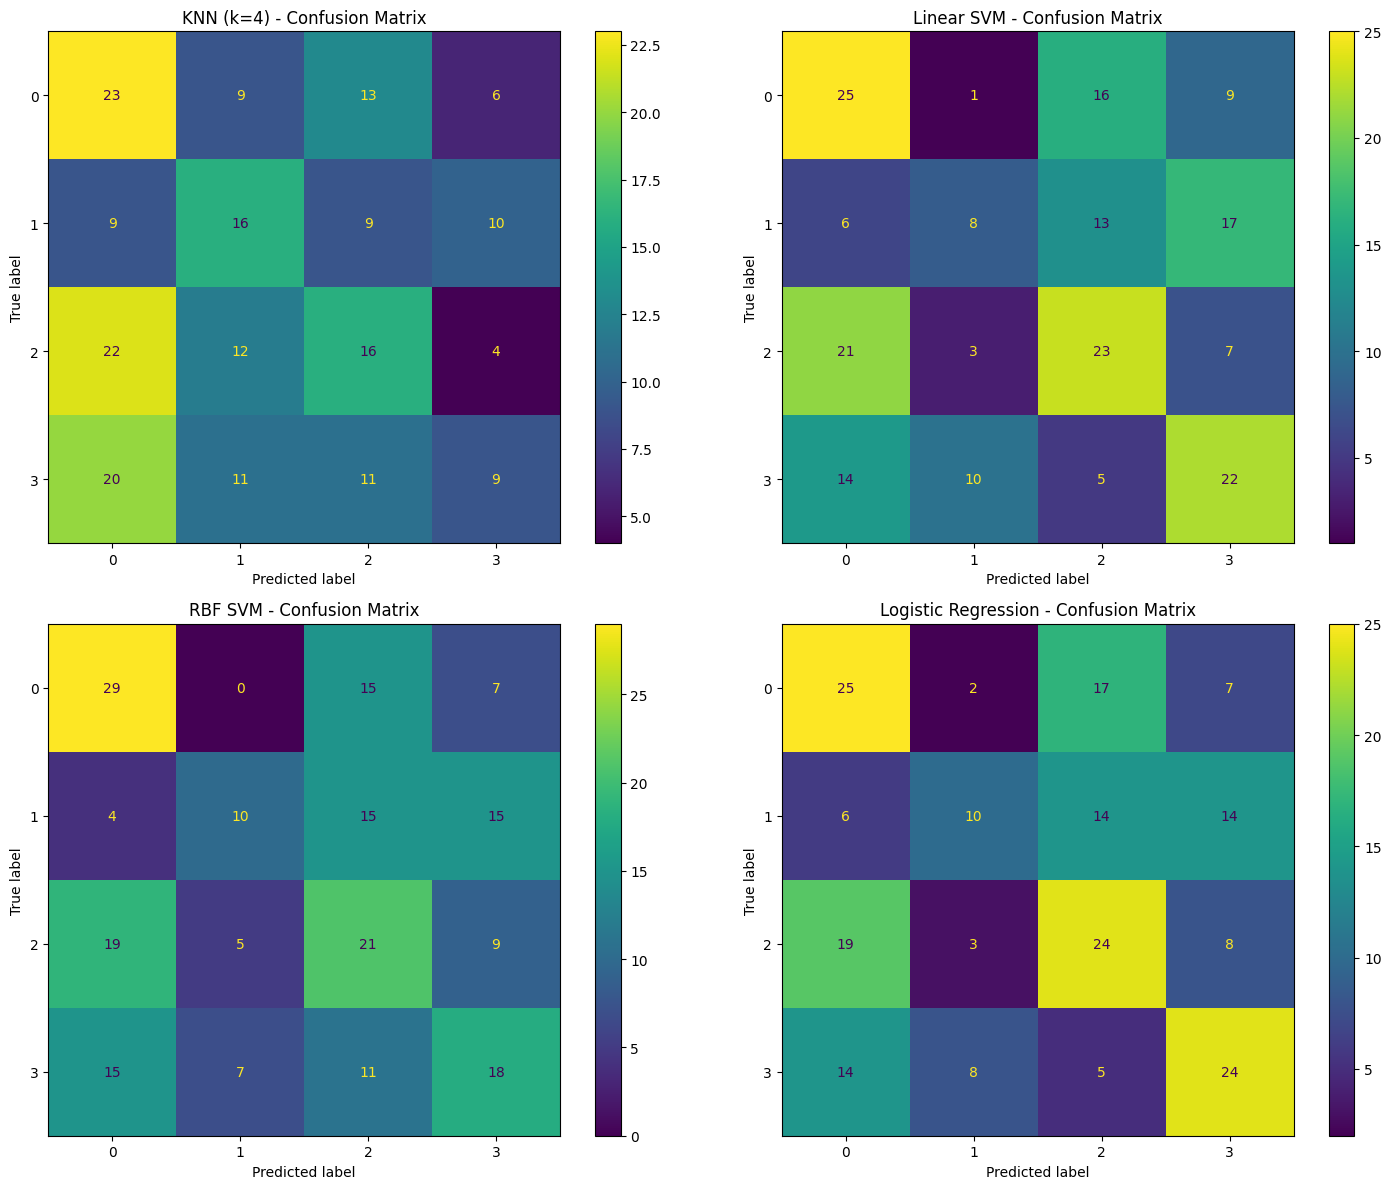


=== Logistic Regression Feature Importance ===
    Feature  Coefficient_Magnitude
1    tenure               0.587910
6        ed               0.358700
5    income               0.199228
2       age               0.171922
0    region               0.127023
4   address               0.098054
3   marital               0.064560
10   reside               0.058121
7    employ               0.055937
8    retire               0.020339
9    gender               0.018267


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

df = pd.read_csv('teleCust1000t.csv')
df.head()

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]

y = df['custcat'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat_knn = neigh.predict(X_test)

from sklearn import metrics
print("\n=== KNN Results ===")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))
print("Test set F1-score: ", metrics.f1_score(y_test, yhat_knn, average='weighted'))

# SVM Model
from sklearn.svm import SVC
print("\n=== SVM Results ===")
# Linear SVM
svm_linear = SVC(kernel='linear', random_state=4)
svm_linear.fit(X_train, y_train)
yhat_svm_linear = svm_linear.predict(X_test)

print("Linear SVM - Train Accuracy: ", metrics.accuracy_score(y_train, svm_linear.predict(X_train)))
print("Linear SVM - Test Accuracy: ", metrics.accuracy_score(y_test, yhat_svm_linear))
print("Linear SVM - Test F1-score: ", metrics.f1_score(y_test, yhat_svm_linear, average='weighted'))

# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=4)
svm_rbf.fit(X_train, y_train)
yhat_svm_rbf = svm_rbf.predict(X_test)

print("RBF SVM - Train Accuracy: ", metrics.accuracy_score(y_train, svm_rbf.predict(X_train)))
print("RBF SVM - Test Accuracy: ", metrics.accuracy_score(y_test, yhat_svm_rbf))
print("RBF SVM - Test F1-score: ", metrics.f1_score(y_test, yhat_svm_rbf, average='weighted'))

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
print("\n=== Logistic Regression Results ===")
logreg = LogisticRegression(random_state=4, max_iter=1000)
logreg.fit(X_train, y_train)
yhat_logreg = logreg.predict(X_test)

print("Logistic Regression - Train Accuracy: ", metrics.accuracy_score(y_train, logreg.predict(X_train)))
print("Logistic Regression - Test Accuracy: ", metrics.accuracy_score(y_test, yhat_logreg))
print("Logistic Regression - Test F1-score: ", metrics.f1_score(y_test, yhat_logreg, average='weighted'))

# Detailed Classification Reports
print("\n=== Detailed Classification Reports ===")
print("\nKNN Classification Report:")
print(metrics.classification_report(y_test, yhat_knn))

print("Linear SVM Classification Report:")
print(metrics.classification_report(y_test, yhat_svm_linear))

print("RBF SVM Classification Report:")
print(metrics.classification_report(y_test, yhat_svm_rbf))

print("Logistic Regression Classification Report:")
print(metrics.classification_report(y_test, yhat_logreg))

# Comparison Summary
print("\n=== MODEL COMPARISON SUMMARY ===")
models = {
    'KNN (k=4)': yhat_knn,
    'Linear SVM': yhat_svm_linear,
    'RBF SVM': yhat_svm_rbf,
    'Logistic Regression': yhat_logreg
}

comparison_results = []
for name, y_pred in models.items():
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    comparison_results.append({
        'Model': name,
        'Test Accuracy': f"{accuracy:.4f}",
        'Test F1-score': f"{f1:.4f}"
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

# Confusion Matrix Visualization (optional)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(models.items()):
    cm = metrics.confusion_matrix(y_test, y_pred)
    metrics.ConfusionMatrixDisplay(cm).plot(ax=axes[idx])
    axes[idx].set_title(f'{name} - Confusion Matrix')

plt.tight_layout()
plt.show()

# Feature importance from Logistic Regression (if interpretability is needed)
if hasattr(logreg, 'coef_'):
    print("\n=== Logistic Regression Feature Importance ===")
    feature_names = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient_Magnitude': np.abs(logreg.coef_[0])
    }).sort_values('Coefficient_Magnitude', ascending=False)
    print(importance_df)

In [ ]:
#یادت باشه که همیشه من پیشت هستم و بهت ایمان دارم که میتونی، حتی اگه خودت به خودت شک کنی :)